In [1]:
import pandas as pd

# Loading and preprocessing steps
df = pd.read_csv('../TimeSeriesForecasting/PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


Text(0.5, 0, 'Date')

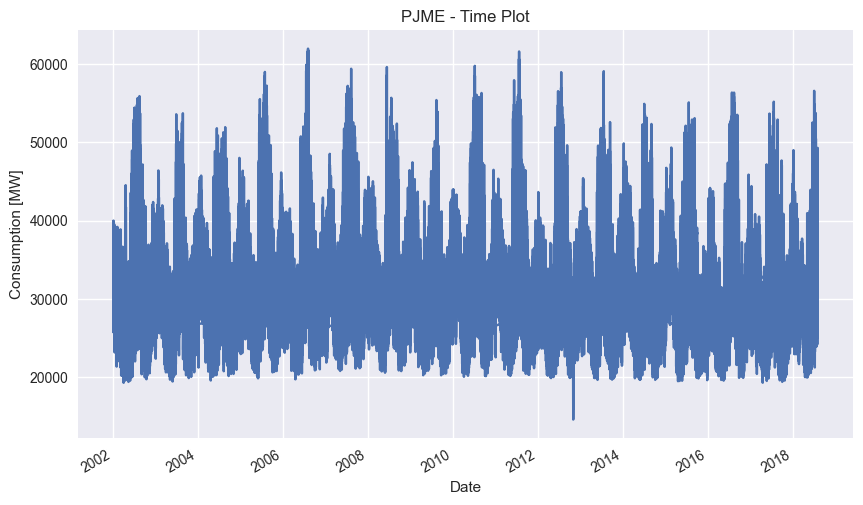

In [2]:
import matplotlib.pyplot as plt
 
# Set pyplot style
plt.style.use("seaborn")

# Plot
df['PJME_MW'].plot(title='PJME - Time Plot', figsize=(10,6))
plt.ylabel('Consumption [MW]')
plt.xlabel('Date')

In [3]:
# Defining required fields
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df = df.reset_index()
df['week'] = df['Datetime'].apply(lambda x:x.week)
df = df.set_index('Datetime')
df['hour'] = [x for x in df.index.hour]
df['day'] = [x for x in df.index.day_of_week]
df['day_str'] = [x.strftime('%a') for x in df.index]
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]

In [4]:
print(df)

                     PJME_MW  year  month  week  hour  day day_str year_month
Datetime                                                                     
2002-12-31 01:00:00  26498.0  2002     12     1     1    1     Tue    2002_12
2002-12-31 02:00:00  25147.0  2002     12     1     2    1     Tue    2002_12
2002-12-31 03:00:00  24574.0  2002     12     1     3    1     Tue    2002_12
2002-12-31 04:00:00  24393.0  2002     12     1     4    1     Tue    2002_12
2002-12-31 05:00:00  24860.0  2002     12     1     5    1     Tue    2002_12
...                      ...   ...    ...   ...   ...  ...     ...        ...
2018-01-01 20:00:00  44284.0  2018      1     1    20    0     Mon     2018_1
2018-01-01 21:00:00  43751.0  2018      1     1    21    0     Mon     2018_1
2018-01-01 22:00:00  42402.0  2018      1     1    22    0     Mon     2018_1
2018-01-01 23:00:00  40164.0  2018      1     1    23    0     Mon     2018_1
2018-01-02 00:00:00  38608.0  2018      1     1     0    1     T

In [6]:
df

,PJME_MW,year,month,week,hour,day,day_str,year_month
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,1,1,Tue,2002_12
2002-12-31 02:00:00,25147.0,2002,12,1,2,1,Tue,2002_12
2002-12-31 03:00:00,24574.0,2002,12,1,3,1,Tue,2002_12
2002-12-31 04:00:00,24393.0,2002,12,1,4,1,Tue,2002_12
2002-12-31 05:00:00,24860.0,2002,12,1,5,1,Tue,2002_12
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,2018,1,1,20,0,Mon,2018_1
2018-01-01 21:00:00,43751.0,2018,1,1,21,0,Mon,2018_1
2018-01-01 22:00:00,42402.0,2018,1,1,22,0,Mon,2018_1


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

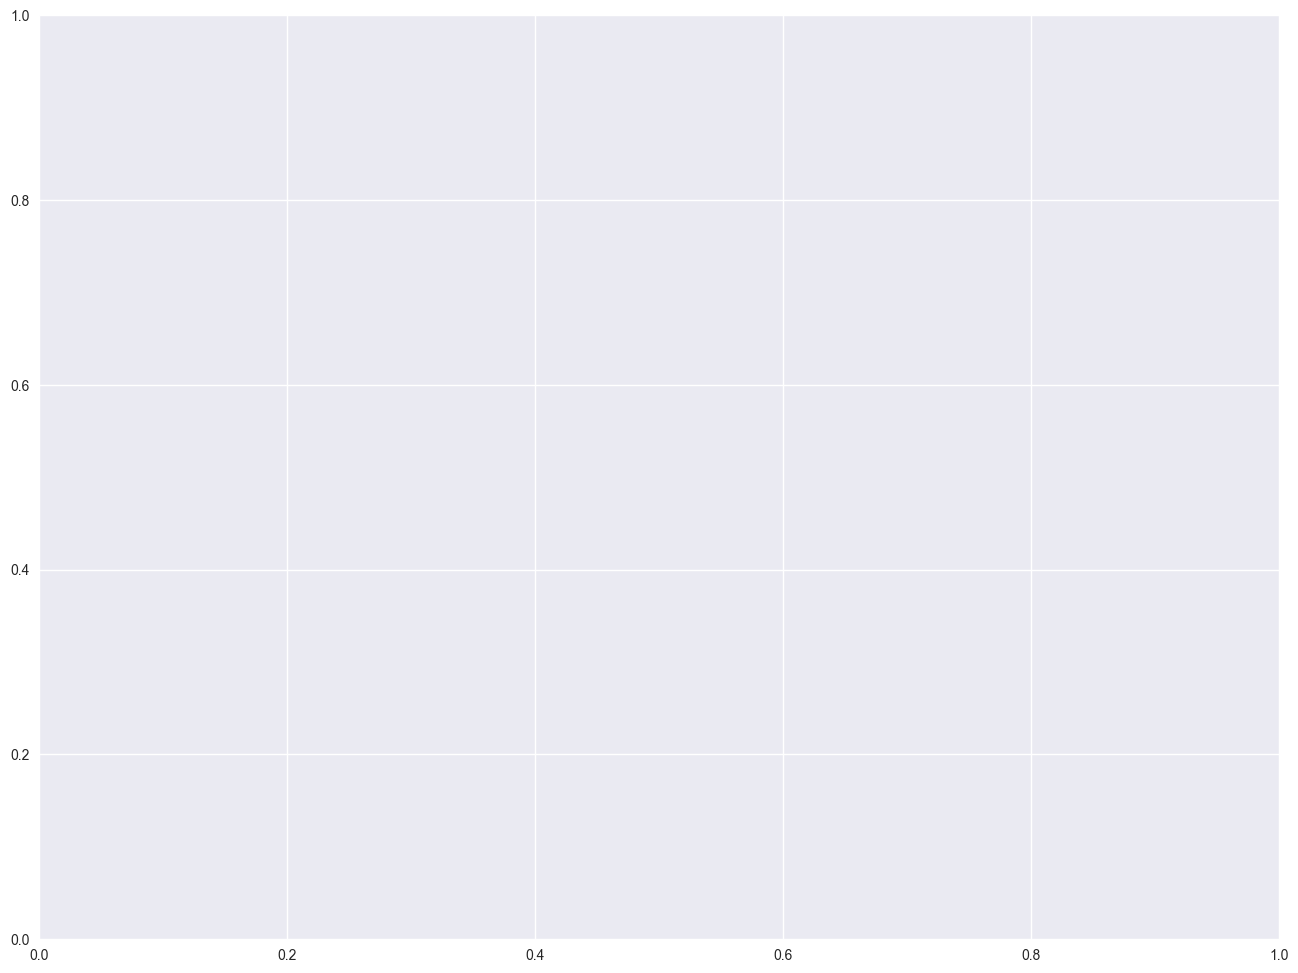

In [5]:
import numpy as np
import matplotlib as mpl

# Defining colors palette
np.random.seed(42)
df_plot = df[['month', 'year', 'PJME_MW']].dropna().groupby(['month', 'year']).mean()[['PJME_MW']].reset_index()
years = df_plot['year'].unique()
colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Plot
plt.figure(figsize=(16,12))
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'PJME_MW', data=df_plot[df_plot['year'] == y], color=colors[i], label=y)
        if y == 2018:
            plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.3, df_plot.loc[df_plot.year==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])
        else:
            plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.1, df_plot.loc[df_plot.year==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])

# Setting labels
plt.gca().set(ylabel= 'PJME_MW', xlabel = 'Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot - Monthly Consumption", fontsize=20)
plt.ylabel('Consumption [MW]')
plt.xlabel('Month')
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

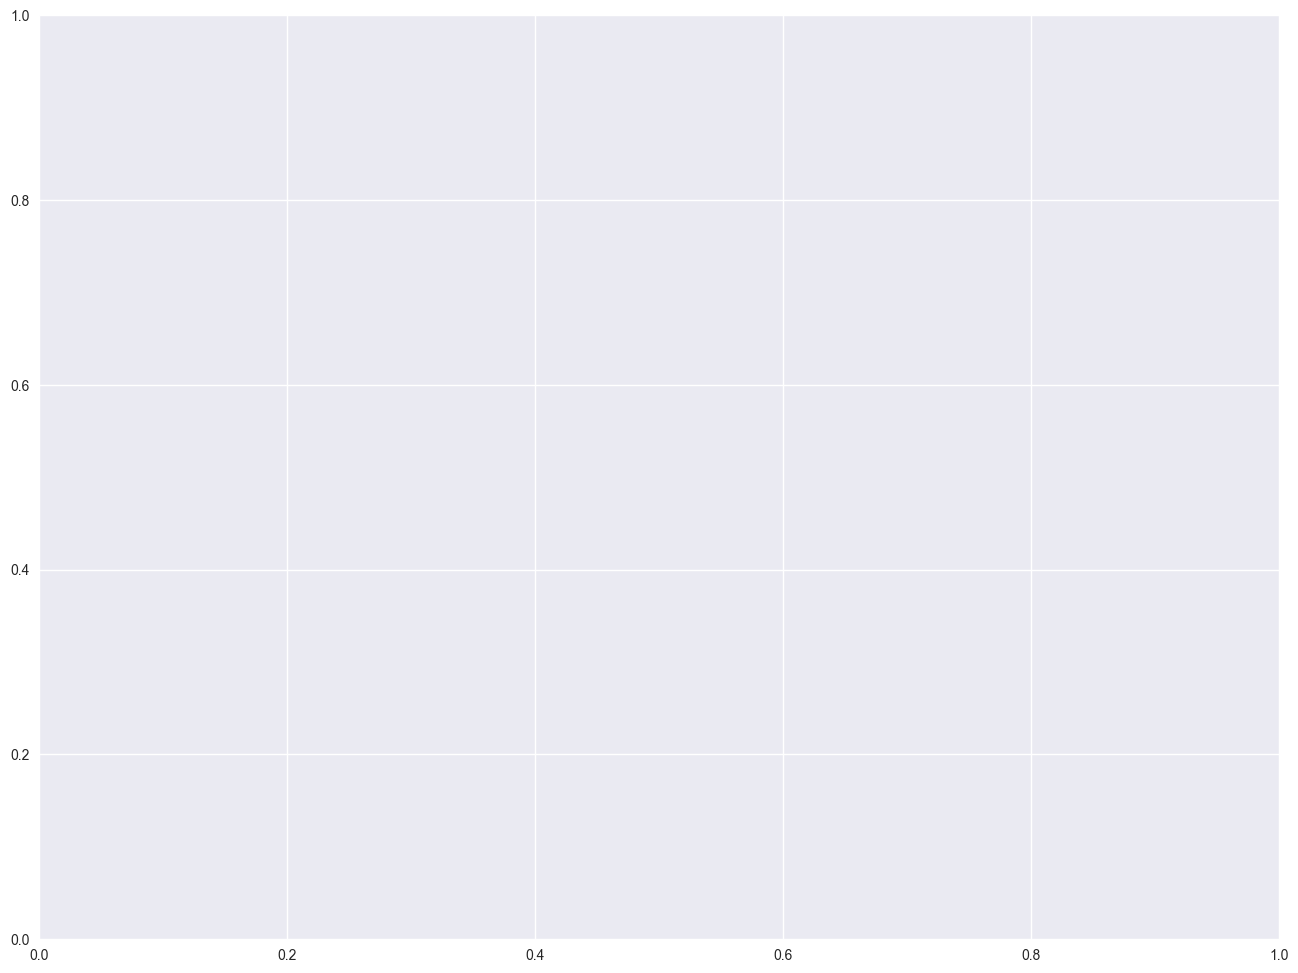

In [8]:
# Defining colors palette
np.random.seed(42)
df_plot = df[['month', 'day_str', 'PJME_MW', 'day']].dropna().groupby(['day_str', 'month', 'day']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by='day', ascending=True)

months = df_plot['month'].unique()
colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(months), replace=False)

# Plot
plt.figure(figsize=(16,12))
for i, y in enumerate(months):
    if i > 0:        
        plt.plot('day_str', 'PJME_MW', data=df_plot[df_plot['month'] == y], color=colors[i], label=y)
        if y == 2018:
            plt.text(df_plot.loc[df_plot.month==y, :].shape[0]-.9, df_plot.loc[df_plot.month==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])
        else:
            plt.text(df_plot.loc[df_plot.month==y, :].shape[0]-.9, df_plot.loc[df_plot.month==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])


# Setting Labels
plt.gca().set(ylabel= 'PJME_MW', xlabel = 'Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot - Weekly Consumption", fontsize=20)
plt.ylabel('Consumption [MW]')
plt.xlabel('Month')
plt.show()

c:\Users\ce_ra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ce_ra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ce_ra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

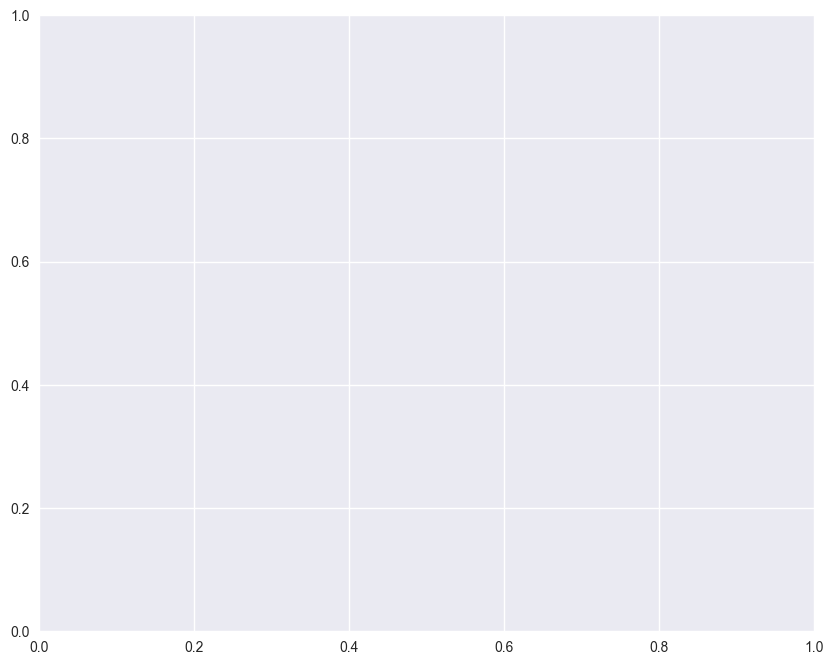

In [9]:
import seaborn as sns

# Defining the dataframe
df_plot = df[['hour', 'day_str', 'PJME_MW']].dropna().groupby(['hour', 'day_str']).mean()[['PJME_MW']].reset_index()

# Plot using Seaborn
plt.figure(figsize=(10,8))
sns.lineplot(data = df_plot, x='hour', y='PJME_MW', hue='day_str', legend=True)
plt.locator_params(axis='x', nbins=24)
plt.title("Seasonal Plot - Daily Consumption", fontsize=20)
plt.ylabel('Consumption [MW]')
plt.xlabel('Hour')
plt.legend()

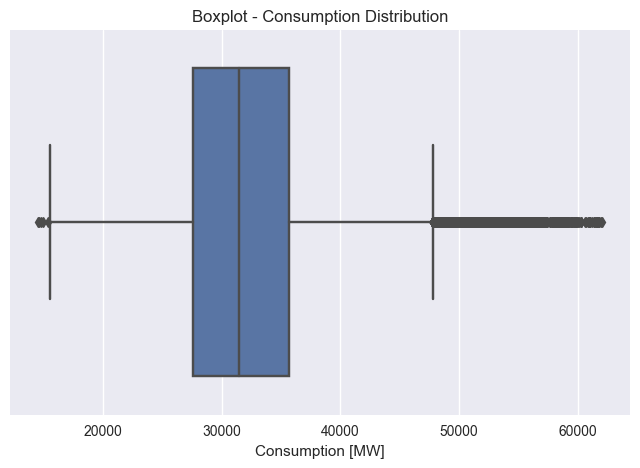

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='PJME_MW')
plt.xlabel('Consumption [MW]')
plt.title(f'Boxplot - Consumption Distribution');

Text(0.5, 0, 'Year Month')

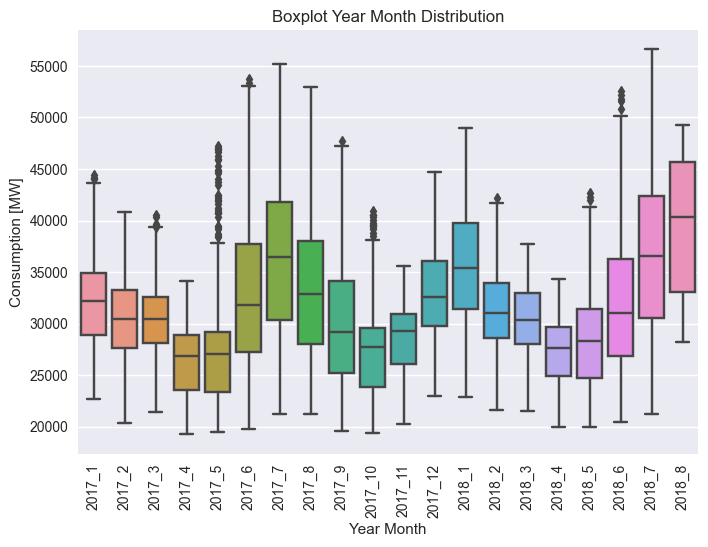

In [11]:
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]

df_plot = df[df['year'] >= 2017].reset_index().sort_values(by='Datetime').set_index('Datetime')
plt.title(f'Boxplot Year Month Distribution');
plt.xticks(rotation=90)
plt.xlabel('Year Month')
plt.ylabel('MW')

sns.boxplot(x='year_month', y='PJME_MW', data=df_plot)
plt.ylabel('Consumption [MW]')
plt.xlabel('Year Month')

Text(0.5, 0, 'Day of week')

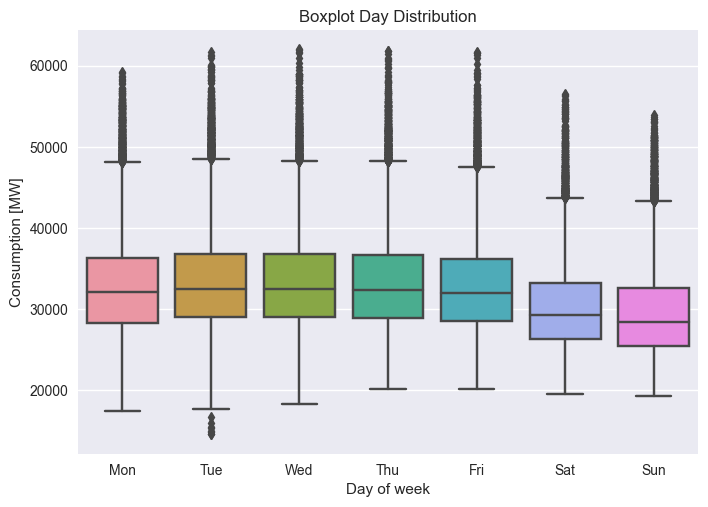

In [12]:
df_plot = df[['day_str', 'day', 'PJME_MW']].sort_values(by='day')
plt.title(f'Boxplot Day Distribution')
plt.xlabel('Day of week')
plt.ylabel('MW')
sns.boxplot(x='day_str', y='PJME_MW', data=df_plot)
plt.ylabel('Consumption [MW]')
plt.xlabel('Day of week')

Text(0.5, 0, 'Hour')

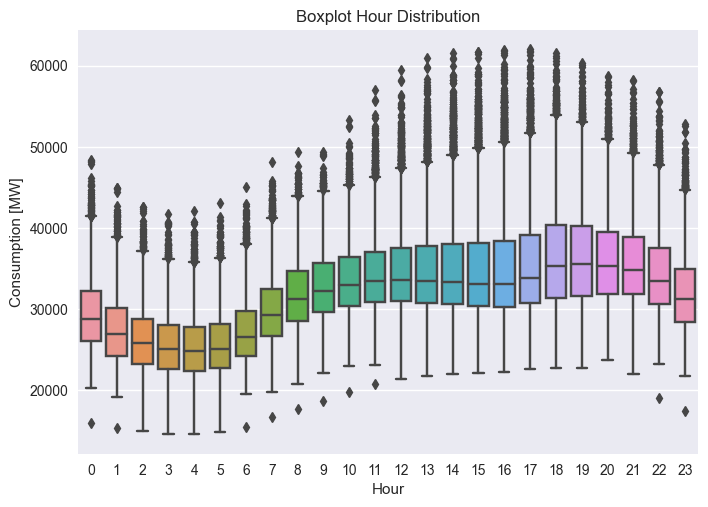

In [13]:
plt.title(f'Boxplot Hour Distribution');
plt.xlabel('Hour')
plt.ylabel('MW')
sns.boxplot(x='hour', y='PJME_MW', data=df)
plt.ylabel('Consumption [MW]')
plt.xlabel('Hour')

## Time Series Decomposition



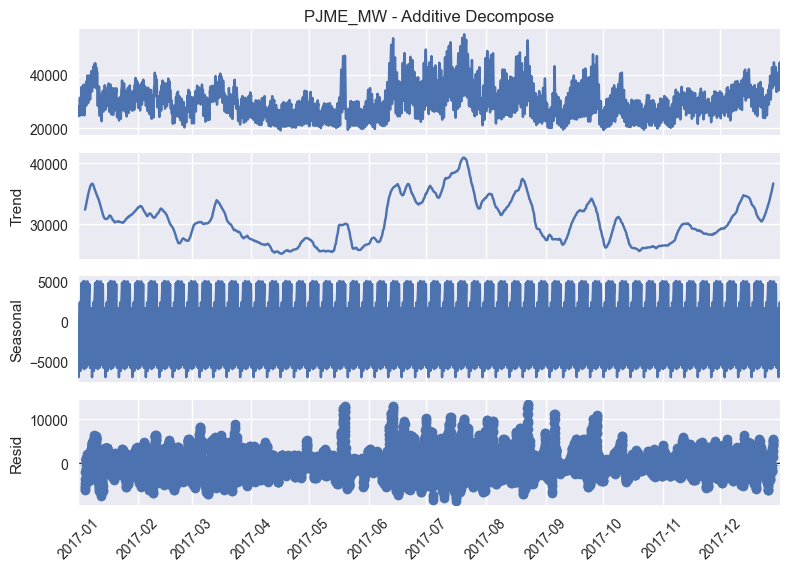

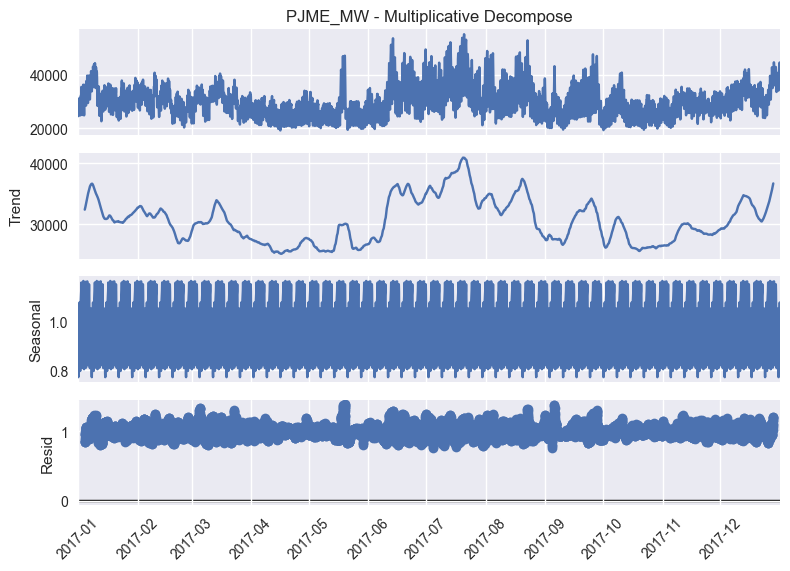

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_plot = df[df['year'] == 2017].reset_index()
df_plot = df_plot.drop_duplicates(subset=['Datetime']).sort_values(by='Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']

# Additive Decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model='additive', period=24*7)

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model='multiplicative', period=24*7)

# Plot
result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
result_mul.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
plt.show()